# Portfolio Project - Customer Segmentation

## 1- Import Libraries

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
%matplotlib inline

## 2- Load dataset

In [180]:
df = pd.read_csv("Mall_Customers.csv", delimiter=",")

## 3- Dataset Inspection

In [181]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [182]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## 4- Data Cleaning 

### 4.1- Data types inspection

In [183]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### 4.2- Inspect for duplicated values

In [184]:
df.duplicated().sum()

0

There are no duplicated values

### 4.3- Check for missing data

In [185]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are not missing values

## 5- EDA (Exploratory Data Analysis)

### 5.1- Numerical Variables EDA

#### 5.1.1- Summary statistics

First, we drop `CustomerID`, since it doesn't provide any information to the analysis.

In [186]:
df_analysis = df.drop(columns='CustomerID')

Now we obtain a summary statistics for numerical variables

In [187]:
df_analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


#### 5.1.2- Value Distributions

In [188]:
def num_plots(df):
    # Select numerical values from df
    num_df = df.select_dtypes(include=['number'])

    # Define number of columns
    ncols = 2

    # Calculate number of rows needed
    rows = ceil(num_df.shape[1] / ncols)  # Number of rows, adjusting to 3 columns per row

    
    # Define graph plot
    fig, ax = plt.subplots(nrows=rows, ncols=ncols, figsize=(10, rows * 6))
    ax = ax.flatten()  # Flattening the axes array for easier iteration

    # Loop through the columns and create the plots
    for i, var in enumerate(num_df.columns):
        sns.histplot(num_df[var], ax=ax[i])
        ax[i].set_title(f"Distribution of {var}")

    # If need it, remove extra subplots
    for j in range(num_df.shape[1], rows*ncols):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()



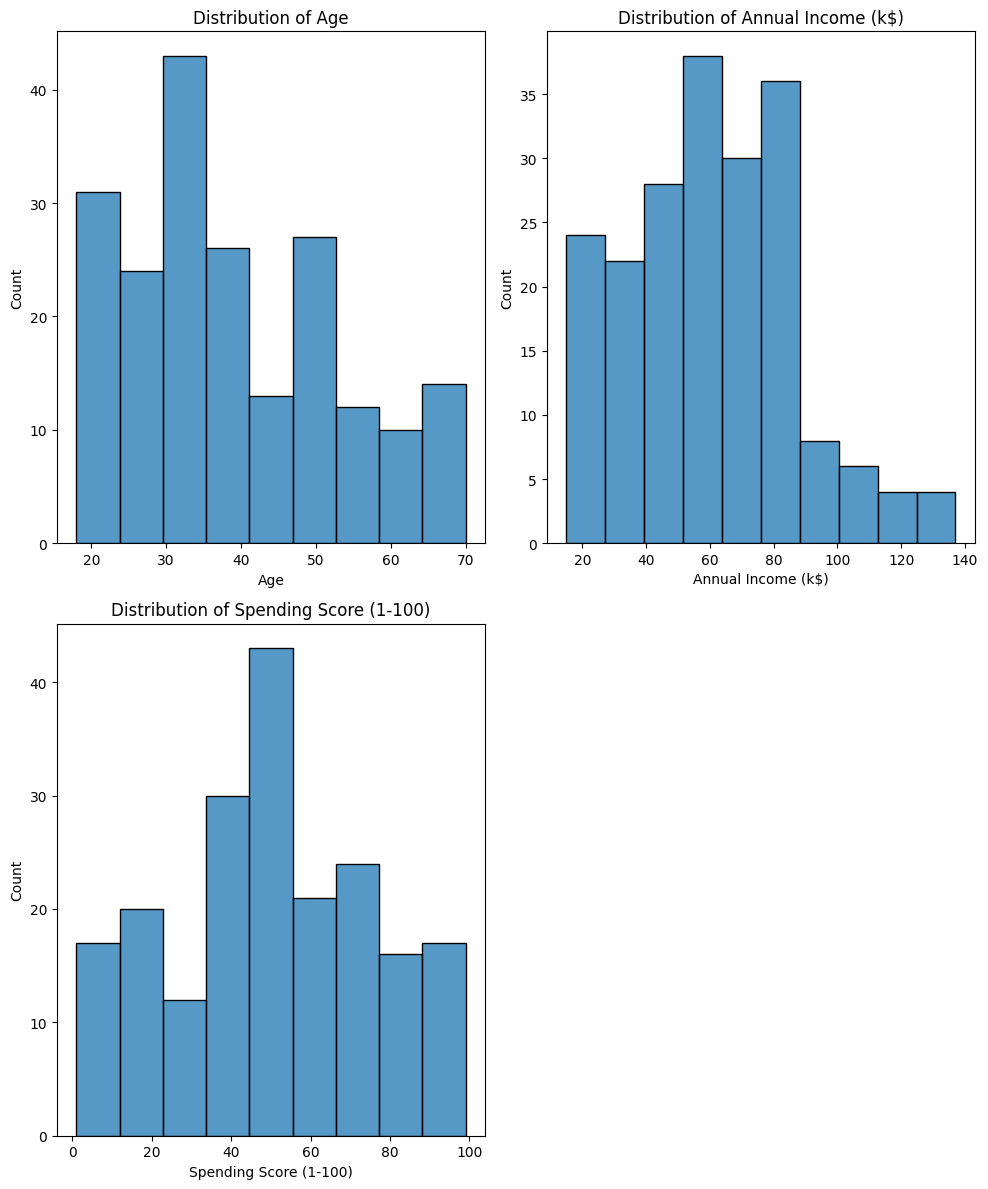

In [189]:
num_plots (df_analysis)

Insights:

- **Age Distribution:**
  - Ages are relatively uniformly distributed across the dataset.
  - A slight increase in frequency is observed in the age group around 30-35 years.
  - Fewer individuals are present in the youngest (<20 years) and oldest (60+ years) age groups.
  - Average of ~39 years with a wide range from 18 to 70 suggests diverse generational needs and values for segmentation.

- **Spending Score (1-100) Distribution:**
  - The distribution of spending scores is bimodal, showing two distinct groups based on spending habits.
  - A significant peak is observed around the score of 50, indicating a large number of individuals with moderate spending scores.
  - Another smaller peak around the score of 80 suggests a group of individuals with high spending scores.
  - Considerable spread in spending habits, around 26 points.

- **Annual Income (k$) Distribution:**
  - The distribution of annual incomes is right-skewed, with most individuals earning between $50k and $80k annually.
  - There is a noticeable decrease in frequency for incomes above $80k.
  - Very few individuals have an annual income over $100k.
  - High variation in income, approximately $26k.


---

### 5.2- Categorical Variables EDA

#### 5.2.1- Gender Distribution

In [190]:
df_analysis['Gender'].value_counts(normalize=True) 

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

We can see there is a majority of Female buyers

#### 5.2.1- Numerical Variables by Genrder

In [191]:
def num_plots_by_cat(df):
    # Select numerical values from df
    num_df = df.select_dtypes(include=['number'])
    
    # Define number of columns
    ncols = 2

    # Calculate number of rows needed
    rows = ceil(num_df.shape[1] / ncols)  # Number of rows, adjusting to 3 columns per row

    
    # Define graph plot
    fig, ax = plt.subplots(nrows=rows, ncols=ncols, figsize=(10, rows * 6))
    ax = ax.flatten()  # Flattening the axes array for easier iteration

    # Loop through the columns and create the plots
    for i, var in enumerate(num_df.columns):
        sns.boxplot(data=df, x='Gender', y=var, ax=ax[i])
        ax[i].set_title(f"Distribution of {var} by Gender")

    # If need it, remove extra subplots
    for j in range(num_df.shape[1], rows*ncols):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

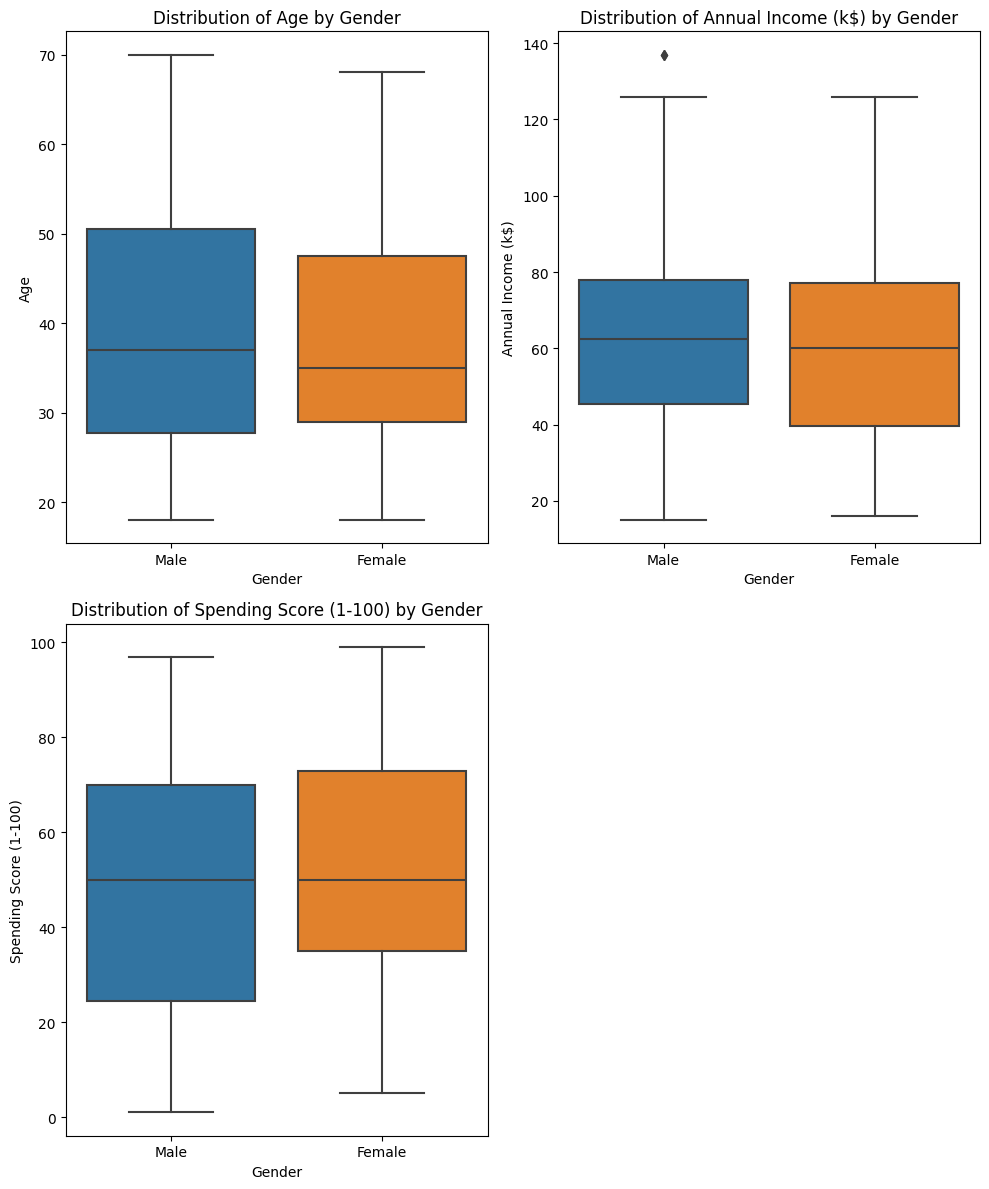

In [192]:
num_plots_by_cat(df_analysis)

### Insights:

- **Age Distribution**: The diverse age range among males implies a need for age-specific marketing strategies, potentially creating distinct segments to cater to the varied interests within this group.

- **Spending Score**: With both genders showing comparable median spending scores but males displaying more variability, there is an opportunity to finely segment males into groups based on their diverse spending patterns for targeted promotions.

- **Annual Income**: The wide income range among males, including some high-income outliers, suggests the presence of a niche for luxury goods, while the more uniform female income distribution could indicate a steady market for loyalty-driven strategies.

--- 

### 5.3- Bivariate Analysis


#### 5.3.1 Correlation Analysis

In [193]:
df_analysis.select_dtypes('number').corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Now we can visualize the correlations using:

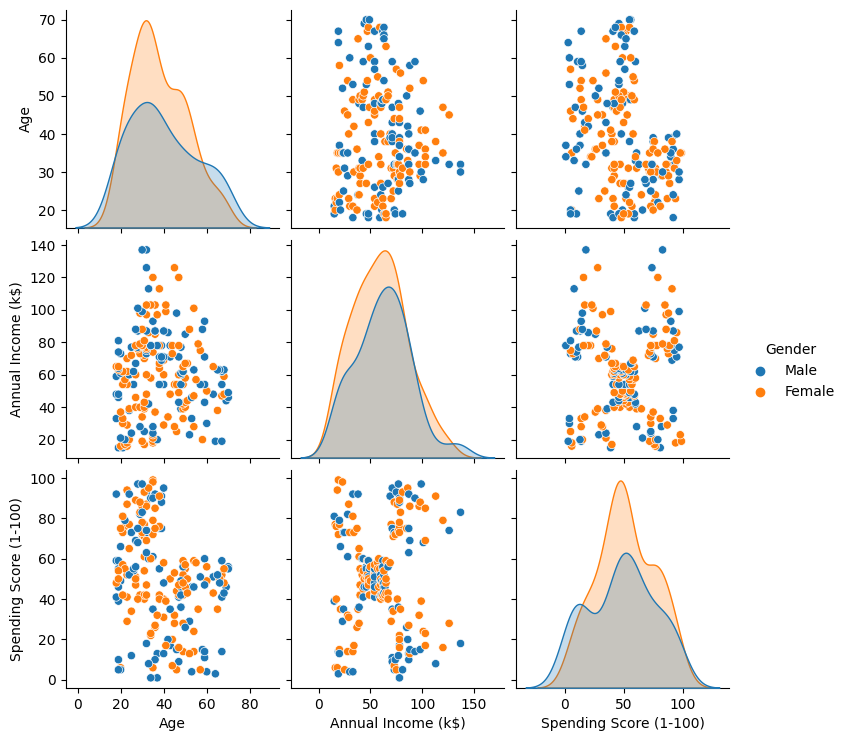

In [194]:

sns.pairplot(df_analysis, hue='Gender')


Finally, we can gain more information by understanding the central tendency

In [195]:
df_analysis.groupby(['Gender'])[ ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


### Insights:

- **Age Distribution**: Comparable between genders; males slightly older on average.
- **Annual Income**: Males have a higher average income than females.
- **Spending Score**: Females exhibit a higher average spending score, despite lower average income.
- **Gender Trends**: No distinct age-related trends in income or spending, indicating diverse spending patterns regardless of age. 
- **Behavioral Overlap**: Similar distribution shapes for both genders, with notable differences in spending habits.

---

## 6- Clustering

For the purposes of the project, the K-Means algorithm will be suitable because of its efficiency, simplicity and ease of interpretation.

### 6.1- Univariate Clustering for different Annual income levels

#### 6.1.1- Initialize Model

In [196]:
clustering1 = KMeans(n_clusters=6, random_state=42)

#### 6.1.2- fit model

In [197]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6, random_state=42)

#### 6.1.3- Store Labels in the DataFrame

In [198]:
df_analysis['Income Cluster'] = clustering1.labels_

df_analysis.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


#### 6.1.4- Display Initial Results

#### 6.1.3- Count Points per Cluster

In [199]:
df_analysis['Income Cluster'].value_counts()

Income Cluster
3    46
0    44
5    42
2    32
1    28
4     8
Name: count, dtype: int64

#### 6.1.4- Calculate Inertia

In [200]:
clustering1.inertia_

5081.484660267269

#### 6.1.5- Evaluate Optimal Number of Clusters by using Elbow Method

In [201]:
# Define array to store inertia scores
inertia_score = []

# Define for loop to iterate between a range of possible number of clusters and store the inertia score obtained
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_analysis[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

In [202]:
inertia_score

[137277.28000000003,
 49761.73701298701,
 25640.457784396836,
 13278.112713472488,
 8688.388977879482,
 5468.858011695906,
 4143.06481018981,
 3168.846279537456,
 2216.614285714286,
 1845.6164141414142]

Now we plot the elbow and evaluate the optimal number of clusters

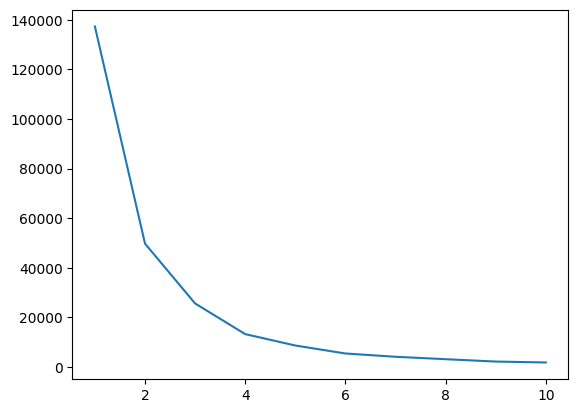

In [203]:
plt.plot(range(1,11), inertia_score)

There seems to be a slight bend around k = 3, also the values in `inertia_score` have shown a great decrease with 1-2 clusters but a low difference from 3-4 clusters. Graphicaly, beyond this point, the decrease in inertia starts to level off, suggesting that additional clusters beyond 3 do not provide substantial improvements in the clustering. Thus, k = 3  could be considered a good choice for the number of clusters according to the elbow method.

#### 6.1.6- Final Results

To obtain the optimal results, we apply the same workflow, initialize model, fit and obtain results, but setting the number of clusters to 3

In [204]:
clustering_opt = KMeans(n_clusters=3, random_state=42)

clustering_opt.fit(df[['Annual Income (k$)']])

df_analysis['Income Cluster'] = clustering_opt.labels_

df_analysis['Income Cluster'].value_counts()


Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

### Insigths

We can understand what is the typical customer for each cluster by obtaining the mean

In [205]:
df_analysis.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


- **Cluster 0**: Middle-aged, moderate income, moderate spending.
- **Cluster 1**: Younger, high income, moderate spending.
- **Cluster 2**: Younger, lower income, slightly lower spending. 

---

## 6.2- Bivariate Clustering

For bivariate clustering, we apply the same workflow as the univariate clustering, initialize model, fit obtain first results and then optimize the number of clusters, but now using both variables `Annual Income (k$)` and `Spending Score (1-100)`.

In [206]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_analysis[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score.append(kmeans.inertia_)

inertia_score

[269981.28,
 183653.32894736837,
 106348.37306211118,
 73880.64496247197,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518779,
 24766.47160979344,
 23103.122085983916]

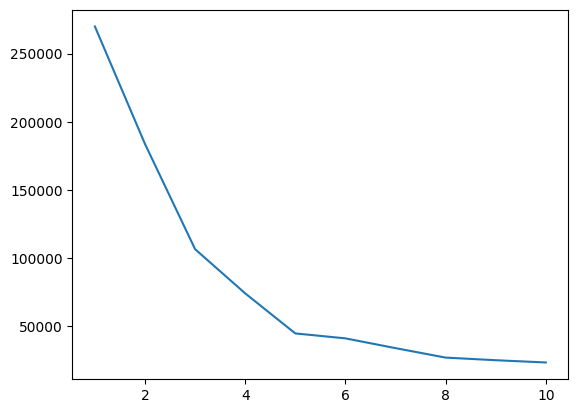

In [207]:
plt.plot(range(1,11), inertia_score)

`inertia_score` values have shown a great decrease up to 5 clusters. Graphicaly, beyond this point, the decrease in inertia starts to level off, suggesting that additional clusters beyond 5 do not provide substantial improvements in the clustering. Thus, k = 5  could be considered a good choice for the number of clusters according to the elbow method.

In [214]:
clustering_b_1 = KMeans(n_clusters=5)
clustering_b_1.fit(df_analysis[['Annual Income (k$)', 'Spending Score (1-100)']])

df_analysis['Spending and Income Cluster'] = clustering_b_1.labels_

### Insights

#### Typical customer per cluster

In [215]:
df_analysis.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


#### Gender distribution by Cluster

In [216]:
pd.crosstab(df_analysis['Spending and Income Cluster'], df_analysis['Gender'], normalize='index') #normalize='index' provides an intra-cluster comparison

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.457143,0.542857


#### Visualizing Results

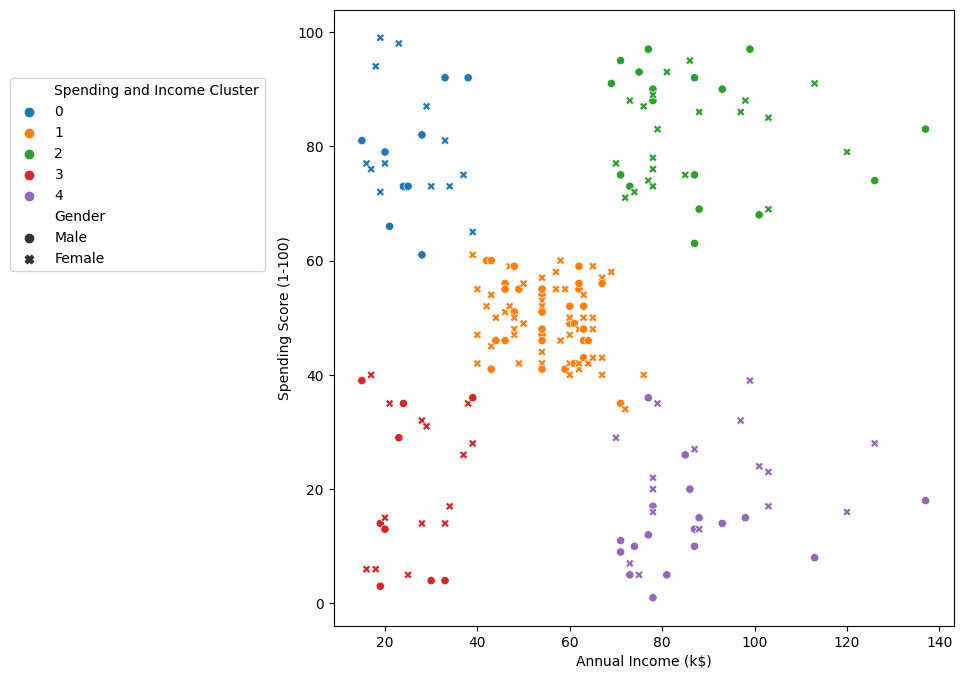

In [217]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_analysis, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', style='Gender', palette='tab10')
plt.legend(loc="upper right", bbox_to_anchor=(-0.1,0.9))

Clusters 0 and 2 have the customers with best spending scores, as this is desirable, we focus further analysis to this two groups.

The clusters that will lead to selling the most are the groups with higher spending scores since this metric is what define the aims of a customer to buy a product. Knowing this, targuet marking campains should target customers among this two groups.

#### Summary Statistics for Selected Groups

In [218]:
df_analysis_target = df_analysis.drop(columns=['Income Cluster', 'Spending and Income Cluster'])

df_analysis_target[df_analysis['Spending and Income Cluster']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,22.0,25.272727,5.257030,18.0,21.25,23.5,29.75,35.0
Annual Income (k$),22.0,25.727273,7.566731,15.0,19.25,24.5,32.25,39.0
Spending Score (1-100),22.0,79.363636,10.504174,61.0,73.00,77.0,85.75,99.0


In [219]:
df_analysis_target[df_analysis['Spending and Income Cluster']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39.0,32.692308,3.728650,27.0,30.0,32.0,35.5,40.0
Annual Income (k$),39.0,86.538462,16.312485,69.0,75.5,79.0,95.0,137.0
Spending Score (1-100),39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0


---

## 7- Conclusions

The analysis indicates that customer groups with higher spending scores are prime targets for sales initiatives, as spending score directly correlates with purchasing intent. Focusing on groups more inclined to purchase can enhance the effectiveness of marketing campaigns.

Key target groups identified are:

- **Group 1 (Cluster 0)**: Characterized by customers with modest incomes yet higher propensity to spend, suggesting they may be more responsive to promotional activities. This cluster predominantly comprises females (59%) and males (41%), mainly within the 18-35 age range, which may reflect a demographic that values style and trends despite having limited income.
  
- **Group 2 (Cluster 2)**: Consists of customers with higher incomes and significant spending scores, indicating substantial purchasing power. This group is slightly more balanced in gender distribution, with females making up 54% and males 46%, aged between 27-40 years old. This demographic likely has established careers and is willing to invest in quality and luxury.